In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.Type.value_counts().sort_index()

,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [ ]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [ ]:
glass.sort_values( by = 'Al', inplace=True)
X = np.array(glass.Al).reshape(-1, 1)
y = glass.household

#Q1

Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]


In [ ]:
for threshold in thresholds:
    predictions = (probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Threshold: 0.40, Accuracy: 0.88, Precision: 0.75, Recall: 0.82
Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Threshold: 0.60, Accuracy: 0.84, Precision: 0.83, Recall: 0.45
Threshold: 0.70, Accuracy: 0.84, Precision: 1.00, Recall: 0.36


#Q2

Do the same analysis for other columns

In [ ]:
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']

In [ ]:
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    for threshold in thresholds:
        predictions = (probs >= threshold).astype(int)

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.40, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.50, Accuracy: 0.86, Precision: 0.86, Recall: 0.55
Element:Na, Threshold: 0.60, Accuracy: 0.81, Precision: 0.80, Recall: 0.36
Element:Na, Threshold: 0.70, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.77, Recall: 0.91
Element:Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.73, Recall: 0.73
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element:Mg, Threshold: 0.

#Q3
Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [ ]:
X = glass.drop(columns=['Type', 'household'])
y = glass['household']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9069767441860465


In [ ]:
y_scores = clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


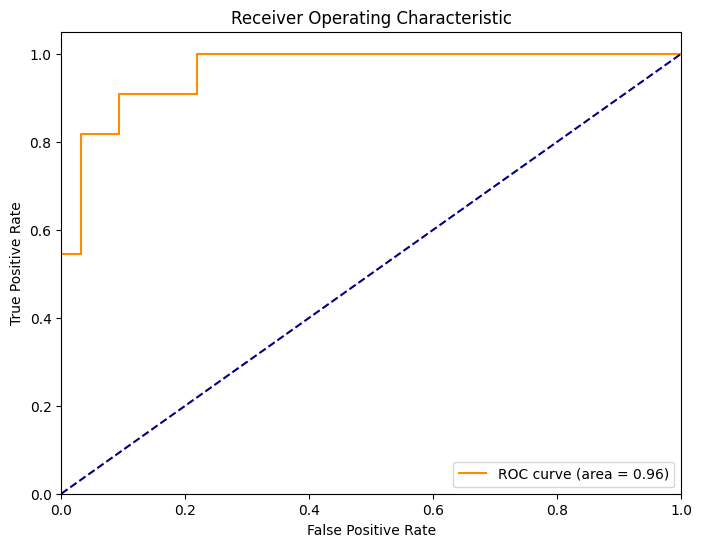

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Curve Position: A curve closer to the top-left corner indicates a better model, with a perfect model reaching a point (0,1).
AUC Value: The Area Under the Curve (AUC) value ranges from 0.5 (no discrimination ability) to 1.0 (perfect discrimination). Higher values indicate a better model performance.



Clustering-

Q1: Repeat the above exercise for different values of k

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('Drive unmounted successfully.')


Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.


In [ ]:
!ls /content

glass.csv  menu.csv  sample_data


In [ ]:
df = pd.read_csv('menu.csv')
print(df.head())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [ ]:
# Check for missing values
print(df.isnull().sum())

# If there are any missing values, you might want to fill or drop them
# df.fillna(method='ffill', inplace=True)  # Example: forward filling missing values

# Scaling features, especially important for clustering when features vary widely in magnitudes
from sklearn.preprocessing import StandardScaler

# Assume we're clustering based on nutritional values, adjust columns as needed
features = ['Calories', 'Total Fat', 'Sugars', 'Protein']  # Example features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])



Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


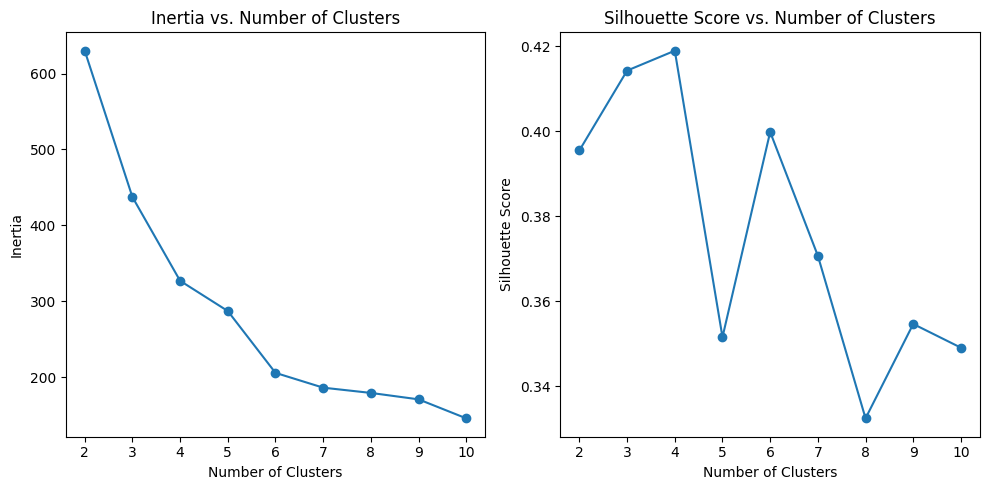

In [ ]:
from sklearn.cluster import KMeans

# Choose a range of k to try
ks = range(2, 11)
inertias = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    from sklearn.metrics import silhouette_score
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plotting the results to find the optimal k
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, '-o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, '-o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [ ]:
# Assuming k=4 is chosen based on the analysis
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Optionally, print out the centroid values to see what the average values are per cluster
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 0.41463891  0.64977922 -0.78429434  0.82468052]
 [ 0.5170351   0.0088117   1.4181182  -0.09756579]
 [ 2.58125286  2.91206522 -0.6594897   2.43353898]
 [-0.80648882 -0.71382925 -0.20027576 -0.72341777]]


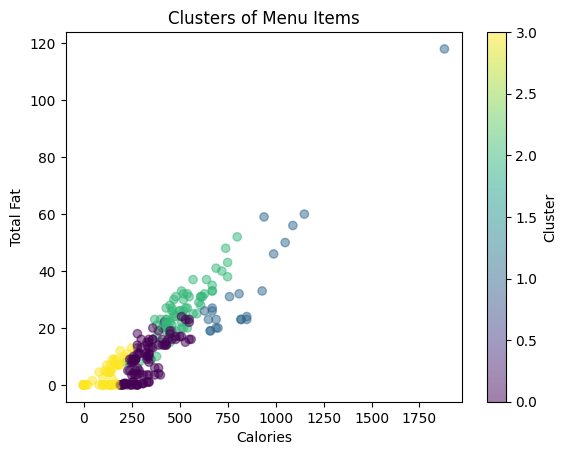

In [ ]:
# Visualizing clusters based on two features (Calories and Total Fat)
plt.scatter(df['Calories'], df['Total Fat'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title('Clusters of Menu Items')
plt.colorbar(label='Cluster')
plt.show()


Q3. What if You Don't Scale Your Features?
Scaling affects the outcome of clustering significantly, especially with features on different scales. Not scaling can skew the clustering towards features with larger magnitudes. Comparing results with and without scaling can highlight these effects.



Q4. Is There a 'Right' k? Why or Why Not?
The "right"
𝑘
k is somewhat subjective and depends on the specific dataset and the business or research objectives. It is typically chosen by looking for an "elbow" in the inertia plot, where the inertia begins to decrease more slowly, indicating diminishing returns by increasing
𝑘
k. The silhouette scores can also guide choosing
𝑘
k by showing where clusters are most distinct.